In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random

%matplotlib inline

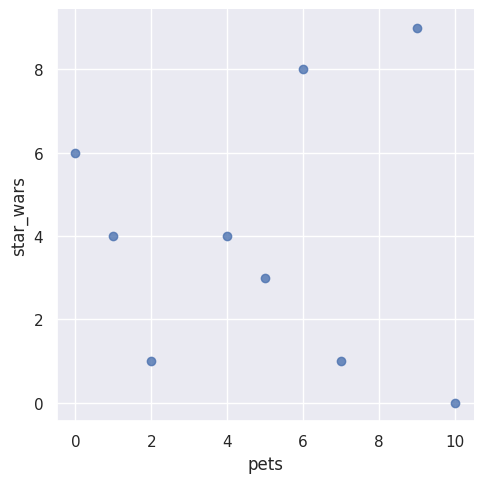

In [5]:
#random.seed(42)
random.seed(45)
#random.seed(44)

k = 3
sara = [7,1]
dea = [10,0]
peter = [0, 6]
mela = [1, 4]
kim = [5,3]
helle = [9,9]
egle = [2,1]
vlad = [4,4]
jimmie = [6,8]

data = [sara, dea, peter, mela, kim, helle, egle, vlad, jimmie]

p = pd.DataFrame(columns=['pets', 'star_wars'], data= data)
sns.lmplot(x='pets', y='star_wars', data = p,fit_reg=False)

In [9]:
def distance(x,y):

    dist = 0
    for i in range(len(x)):
        dist += math.pow((x[i] - y[i]), 2)
    return math.sqrt(dist)

In [11]:
def generate_centroids(k, data):    
    return random.sample(data, k)

In [13]:
def add_to_cluster(item, centroids):
    return item, min(range(len(centroids)), 
                     key= lambda i: distance(item, centroids[i]) )


In [15]:
def add_vector(i, j):
    return [i[k] + j[k] for k in range(len(j))]

add_vector(sara, mela)

[8, 5]

In [18]:
from functools import reduce
def move_centroids(k, kim):
    print("running")
    centroids = []
    for cen in range(k):
        centroid = []
        
        print(cen)
        members = [i[0] for i in kim if i[1] == cen]
        print(members)
    if members:
        centroid = [i/len(members) for i in reduce(add_vector, members)]
        centroids.append(centroid)
        
    return centroids
        

In [28]:
def draw_iteration(centroids, iteration):
        centroids_points = pd.DataFrame([[centroids[i][0],
                                          centroids[i][1], 
                                          i] for i in range(len(centroids))],
                                          columns=['pets', 'star_wars', 'cluster'])
        centroids_points["cluster"] = ["{} centroid".format(i) 
                                       for i in range(len(centroids))]
        ds = pd.DataFrame(columns = ['pets', 'star_wars', 'cluster'], 
                          data= [[i[0][0], i[0][1], i[1]] for i in iteration])
        full_ds = pd.concat([ds, centroids_points], ignore_index=True)

        g = sns.FacetGrid(data=full_ds,
                       hue="cluster",
                       hue_order=[0, 1, 2 , "0 centroid", "1 centroid", "2 centroid"],
                       palette=["b", "r", "g", "b", "r", "g"],
                       hue_kws={"s": [20, 20, 20, 500, 500, 500],
                          "marker": ["o", "o", "o", "+", "+", "+"]})
        g.map(plt.scatter,'pets','star_wars', linewidth=1, edgecolor="w")
        g.add_legend()

In [29]:
def k_means(k, data):
    best_weight = math.inf
    
    centroids = generate_centroids(k, data)
    
    while True:   
       
        [print("centroid {}".format(c)) for c in centroids]
        # appoint each point to a cluster
        iteration = list([add_to_cluster(item, centroids) for item in data])
        
        draw_iteration(centroids, iteration)
        
        new_weight = 0
        
        # calculate the distance between each item, and its centroid
        for i in iteration:
            new_weight += distance(i[0], centroids[i[1]])

centroid [9, 9]
centroid [7, 1]
centroid [4, 4]


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  func(*plot_args, **plot_kwargs)


weight: inf, new weight: 18.816456113173423
running
0
[[9, 9], [6, 8]]
1
[[7, 1], [10, 0]]
2
[[0, 6], [1, 4], [5, 3], [2, 1], [4, 4]]
centroid [2.4, 3.6]


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  func(*plot_args, **plot_kwargs)


weight: 18.816456113173423, new weight: 39.704425623869554
clusters found


[([7, 1], 0),
 ([10, 0], 0),
 ([0, 6], 0),
 ([1, 4], 0),
 ([5, 3], 0),
 ([9, 9], 0),
 ([2, 1], 0),
 ([4, 4], 0),
 ([6, 8], 0)]

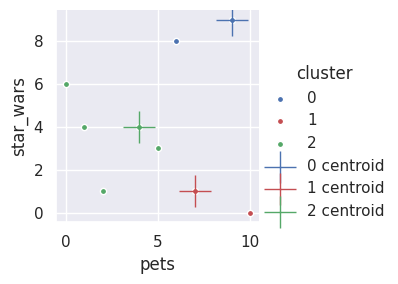

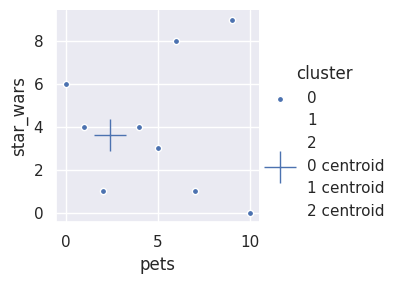

In [31]:
def k_means(k, data):
    best_weight = math.inf
    
    centroids = generate_centroids(k, data)
    
    while True:   
       
        [print("centroid {}".format(c)) for c in centroids]
        # appoint each point to a cluster
        iteration = list([add_to_cluster(item, centroids) for item in data])
        
        draw_iteration(centroids, iteration)
        
        new_weight = 0
        
        # calculate the distance between each item, and its centroid
        for i in iteration:
            new_weight += distance(i[0], centroids[i[1]])
        
        # if the new weight we continue otherwise we return.
        print("weight: {}, new weight: {}".format(best_weight, new_weight))    
        if new_weight < best_weight:
            best_weight = new_weight
        else:
            print("clusters found")
            return iteration

        # recalculate centroids
        centroids = move_centroids(k, iteration)
        
k_means(k, data)

In [32]:
from sklearn.cluster import KMeans

k = KMeans()
clusters = k.fit(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
clusters

KMeans()

In [35]:
clusters.score

<bound method _BaseKMeans.score of KMeans()>